# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_request=requests.get(btc_url)
btc_data=btc_request.json()

# Fetch current ETH price
eth_request=requests.get(eth_url)
eth_data=eth_request.json()

In [7]:
# Compute current value of my crpto
my_btc_value =btc_data['data']['1']['quotes']['CAD']['price']*my_btc
my_eth_value =eth_data['data']['1027']['quotes']['CAD']['price']*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51826.41
The current value of your 5.3 ETH is $14839.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

Prices for SPY and AGG are for **7 Jun 2021**

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

str

In [10]:
# Create the Alpaca API object
api=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [11]:
# Format current date as ISO format
today=pd.Timestamp("2021-06-07",tz="America/New_York").isoformat()

In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [13]:
# Get current closing prices for SPY and AGG
df_tickers=api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000

).df

In [14]:
# Preview DataFrame
df_tickers.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918  422.59   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-07 00:00:00-04:00  422.78  421.19  422.23  41442963

In [15]:
# Pick AGG and SPY close prices
agg_close_price=float(df_tickers["AGG"]["close"])
spy_close_price=float(df_tickers["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.595
Current SPY closing price: $422.23


In [16]:
# Compute the current value of shares
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21111.50
The current value of your 200 AGG shares is $22919.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value=my_btc_value+my_eth_value
share_value=my_spy_value

# Create savings DataFrame
df_savings=pd.DataFrame(columns=["Amount"])
df_savings.loc["Crypto"]=crypto_value
df_savings.loc["Shares"]=share_value

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,66666.331776
Shares,21111.500000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

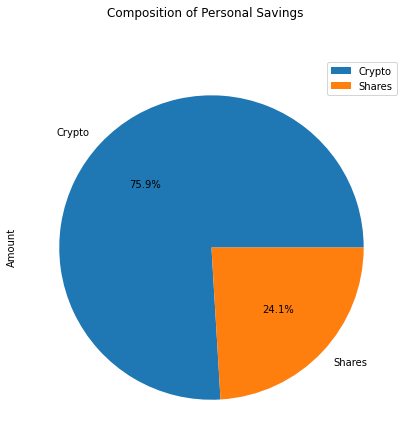

In [18]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title="Composition of Personal Savings",figsize=(7,7),autopct='%1.1f%%')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=df_savings["Amount"].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print(f"Your total savings is less than required emergency fund by ${emergency_fund-total_savings}")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

**Dates Chosen** 
* Start Date : 2016-05-01 
* End Date: 2021-05-01

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# Get 5 years' worth of historical data for SPY and AGG
start_date1 = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2017-05-09', tz='America/New_York').isoformat()

In [21]:
df_stock_data1=api.get_barset(
        tickers,
        timeframe,
        start=start_date1,
        end=end_date1,
        limit=1000

).df

In [22]:
df_stock_data1.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-05-02 00:00:00-04:00  206.92  208.18  206.41  207.97  52152807  
2016-05-03 00:00:00-04:00  206.52  206.80  205.28  206.15  79397652  
2016-05-04 00:00:00-04:00  204.99  205.85  204.42  204.99  73747383  
2016-05-05 00:00:00-04:00  205.56  205.98  204.47  204.98  58322810  
2016-05-06 00:00:00-04:00  204.06  205.77  203.88  205.70  69458860

In [24]:
# Getting data from 2017-05-09 to 2021-05-01
start_date2 = pd.Timestamp('2017-05-9', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data2=api.get_barset(
        tickers,
        timeframe,
        start=start_date2,
        end=end_date2,
        limit=1000

).df

In [27]:
df_stock_data2.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [28]:
# Combining the Data collected from Alpaca API 
df_stock_data=pd.concat([df_stock_data1,df_stock_data2])

In [29]:
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-05-02 00:00:00-04:00  206.92  208.18  206.41  207.97  52152807  
2016-05-03 00:00:00-04:00  206.52  206.80  205.28  206.15  79397652  
2016-05-04 00:00:00-04:00  204.99  205.85  204.42  204.99  73747383  
2016-05-05 00:00:00-04:00  205.56  205.98  204.47  204.98  58322810  
2016-05-06 00:00:00-04:00  204.06  205.77  203.88  205.70  69458860

#### **Forecast 30 years Cumulative Returns**

**Weights**: Stock ('SPY') 0.6 and Bonds ('AGG') 0.4**

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
stock_weights=[0.40,0.60]

# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years=MCSimulation(
        portfolio_data=df_stock_data,
        weights=stock_weights,
        num_simulation=500,
        num_trading_days=252*30

)

In [31]:
#  the simulation data
MC_30years.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   
2016-05-09 00:00:00-04:00  111.11  111.1400  111.0050  111.045  2015655   
2016-05-10 00:00:00-04:00  111.06  111.1000  110.9900  111.080  1960137   
2016-05-11 00:00:00-04:00  111.06  111.2600  111.0200  111.090  2335411   
2016-05-12 00:00:00-04:00  110.92  111.1000  110.9200  111.000  1392244   
2016-05-13 00:00:00-04:00  111.08  111.2300  111.0300  111.190  1342222   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2016-05-02 00:00:00-04:00          NaN  206.92  208.1800  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.8000  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.8500  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.9800  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.7700  203.88  205.70   
2016-05-09 00:00:00-04:00     0.000405  205.57  206.4000  205.36  205.89   
2016-05-10 00:00:00-04:00     0.000315  206.72  208.4600  206.64  208.43   
2016-05-11 00:00:00-04:00     0.000090  207.91  208.5400  206.50  206.56   
2016-05-12 00:00:00-04:00    -0.000810  207.29  207.4899  205.37  206.56   
2016-05-13 00:00:00-04:00     0.001712  206.21  206.8600  204.38  204.76   

                                                  
                             volume daily_return  
time                                              
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513  
2016-05-09 00:00:00-04:00  53888869     0.000924  
2016-05-10 00:00:00-04:00  55896067     0.012337  
2016-05-11 00:00:00-04:00  64350055    -0.008972  
2016-05-12 00:00:00-04:00  74951582     0.000000  
2016-05-13 00:00:00-04:00  79114901    -0.008714

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002145,0.995156,1.017172,1.003244,0.991502,0.998432,1.006058,0.992066,1.004821,0.998302,...,1.001098,0.998744,1.001582,1.008909,1.002973,0.992693,0.999989,1.001300,0.986374,0.998989
2,1.018895,0.995854,1.017595,0.991888,0.997555,1.006852,1.004386,0.988687,1.022935,0.990910,...,0.999149,1.000229,1.014087,1.019791,1.007596,1.001054,0.999923,0.991331,0.993545,0.991825
3,1.020251,1.011784,1.030280,0.987363,0.996533,1.001574,1.001193,0.994698,1.033960,0.994774,...,1.003218,0.998002,1.010831,1.020575,1.012057,1.002580,1.001260,1.003483,0.987460,0.999298
4,1.014454,1.012560,1.037964,0.991072,1.003581,1.005419,0.982108,0.993149,1.020550,0.992047,...,1.003042,1.008329,1.005377,1.014525,1.015747,1.004160,0.984486,1.018013,0.976002,1.006932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.557352,25.659864,19.431669,55.338624,9.139133,21.994714,9.478582,13.538331,5.548696,12.519964,...,22.274507,6.466609,10.931839,9.842656,8.275884,10.049524,14.470058,14.294565,6.686422,17.171741
7557,14.723821,25.938273,19.378079,55.694285,9.096315,22.322504,9.435232,13.399952,5.530728,12.395663,...,22.433408,6.399293,10.940679,9.736708,8.326468,10.143033,14.574066,14.350599,6.709715,17.208908
7558,14.879436,25.684845,19.532473,55.500413,9.132309,22.304157,9.487944,13.366448,5.547262,12.360234,...,22.601604,6.451575,11.034020,9.624794,8.301830,10.120041,14.755106,14.372923,6.770612,17.118881
7559,14.604049,25.701473,19.621195,56.171648,9.109046,22.275734,9.446314,13.450250,5.517926,12.461700,...,22.673543,6.444922,11.107895,9.682090,8.319148,10.107876,14.729728,14.331463,6.828424,17.219229


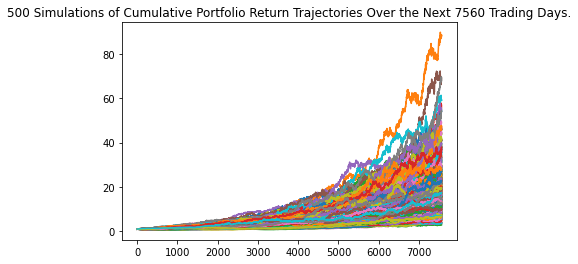

In [33]:
# Plot simulation outcomes
line_plot=MC_30years.plot_simulation()

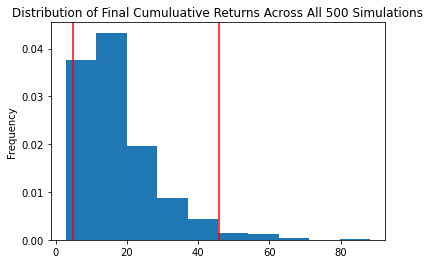

In [34]:
# Plot probability distribution and confidence intervals
dist_plot=MC_30years.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.683685
std              11.172939
min               2.877456
25%              10.059940
50%              14.994631
75%              22.306408
max              88.303527
95% CI Lower      4.976855
95% CI Upper     45.801479
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99537.11 and $916029.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $149305.66 and $1374044.37


#### By increasing initial investment by 50%, the cumulative returns of the portfolio has substantially increased. This shows the **Power of Compounding**

## Optional Challenge - Early Retirement


### Five Years Retirement Option

**weights towards stock from 60%**

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
stock_weights=[0.4,0.60]

MC_five_years=MCSimulation(
        portfolio_data=df_stock_data,
        weights=stock_weights,
        num_simulation=500,
        num_trading_days=252*5

)
MC_five_years.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   
2016-05-09 00:00:00-04:00  111.11  111.1400  111.0050  111.045  2015655   
2016-05-10 00:00:00-04:00  111.06  111.1000  110.9900  111.080  1960137   
2016-05-11 00:00:00-04:00  111.06  111.2600  111.0200  111.090  2335411   
2016-05-12 00:00:00-04:00  110.92  111.1000  110.9200  111.000  1392244   
2016-05-13 00:00:00-04:00  111.08  111.2300  111.0300  111.190  1342222   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2016-05-02 00:00:00-04:00          NaN  206.92  208.1800  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.8000  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.8500  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.9800  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.7700  203.88  205.70   
2016-05-09 00:00:00-04:00     0.000405  205.57  206.4000  205.36  205.89   
2016-05-10 00:00:00-04:00     0.000315  206.72  208.4600  206.64  208.43   
2016-05-11 00:00:00-04:00     0.000090  207.91  208.5400  206.50  206.56   
2016-05-12 00:00:00-04:00    -0.000810  207.29  207.4899  205.37  206.56   
2016-05-13 00:00:00-04:00     0.001712  206.21  206.8600  204.38  204.76   

                                                  
                             volume daily_return  
time                                              
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513  
2016-05-09 00:00:00-04:00  53888869     0.000924  
2016-05-10 00:00:00-04:00  55896067     0.012337  
2016-05-11 00:00:00-04:00  64350055    -0.008972  
2016-05-12 00:00:00-04:00  74951582     0.000000  
2016-05-13 00:00:00-04:00  79114901    -0.008714

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005626,1.006268,1.009688,0.998092,0.999299,1.000655,1.012611,0.994663,0.996817,0.991948,...,1.000142,0.995082,0.995099,1.000033,0.981693,0.994955,0.997934,1.007030,1.000971,0.993473
2,1.008552,1.001825,1.018170,0.997766,1.001676,1.002676,1.000534,0.992336,0.999759,0.986908,...,1.006094,1.004279,0.993066,1.006166,0.979561,0.986353,1.002154,0.999599,1.005131,0.985522
3,1.007892,1.022760,1.024958,0.990476,1.014089,1.006303,0.995977,0.987395,0.991929,0.994995,...,1.008706,1.014046,0.995138,1.004572,0.983362,0.986974,1.003831,0.997664,1.004389,0.988068
4,1.012255,1.021523,1.030610,0.999017,1.018118,1.002042,1.007814,0.983550,0.982942,1.004636,...,1.019593,1.010679,1.001627,1.015420,0.981469,0.988092,0.999403,1.006557,0.999772,0.977741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.101314,1.141089,1.418545,1.717375,1.615572,1.639216,1.463599,1.397173,1.645908,1.998518,...,1.422014,1.725719,1.704432,2.028081,1.624404,1.474506,1.456511,1.533715,1.731590,1.216055
1257,2.113269,1.130294,1.405757,1.711384,1.605488,1.633927,1.484953,1.404841,1.673692,1.993712,...,1.410451,1.735106,1.696613,2.039435,1.620543,1.463463,1.464775,1.526176,1.749046,1.205519
1258,2.100928,1.140735,1.413253,1.707460,1.618353,1.646382,1.485391,1.407488,1.667125,2.013418,...,1.410232,1.753669,1.698441,2.052191,1.628640,1.473724,1.471961,1.521401,1.746976,1.207331
1259,2.083794,1.131429,1.416385,1.694059,1.617739,1.637720,1.486169,1.394888,1.676260,2.033592,...,1.424284,1.758386,1.716542,2.052148,1.621521,1.473135,1.461833,1.520518,1.729001,1.207439


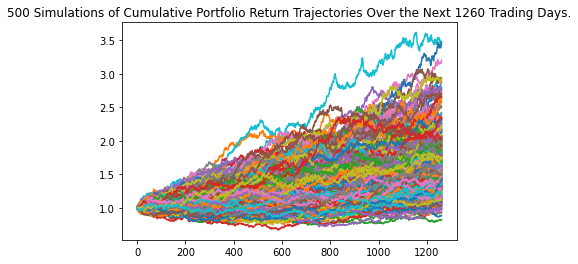

In [41]:
# Plot simulation outcomes
line_plot_5yr=MC_five_years.plot_simulation()

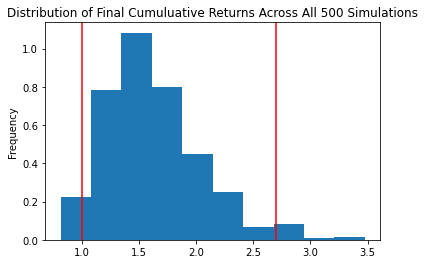

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_5yr=MC_five_years.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five=MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.632523
std               0.423532
min               0.816444
25%               1.336483
50%               1.561606
75%               1.860834
max               3.476553
95% CI Lower      1.003695
95% CI Upper      2.700892
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(tbl_five[8]*initial_investment,2)
ci_upper_five=round(tbl_five[9]*initial_investment,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60221.72 and $162053.5


**For a 5 year retirement option, it would require a much large initial investment and/or higher weighting towards stocks to meet the goal. Caveat: Higher Weighting towards stock increases risk. which might not be suitable to the retirement portfolio with short time horizon. Additional there is a 5% chance the portfolio values will be less than intial investment of $60000**

### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
stock_weights=[0.40,0.60]

MC_ten_years=MCSimulation(
        portfolio_data=df_stock_data,
        weights=stock_weights,
        num_simulation=500,
        num_trading_days=252*10

)
MC_ten_years.portfolio_data.head(10)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-05-02 00:00:00-04:00  110.74  110.7400  110.5200  110.595  3371773   
2016-05-03 00:00:00-04:00  110.89  110.9450  110.7500  110.820  2844893   
2016-05-04 00:00:00-04:00  110.91  110.9315  110.7595  110.880  2600710   
2016-05-05 00:00:00-04:00  110.92  111.1600  110.8010  111.120  2569143   
2016-05-06 00:00:00-04:00  111.12  111.1200  110.9700  111.000  2204464   
2016-05-09 00:00:00-04:00  111.11  111.1400  111.0050  111.045  2015655   
2016-05-10 00:00:00-04:00  111.06  111.1000  110.9900  111.080  1960137   
2016-05-11 00:00:00-04:00  111.06  111.2600  111.0200  111.090  2335411   
2016-05-12 00:00:00-04:00  110.92  111.1000  110.9200  111.000  1392244   
2016-05-13 00:00:00-04:00  111.08  111.2300  111.0300  111.190  1342222   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2016-05-02 00:00:00-04:00          NaN  206.92  208.1800  206.41  207.97   
2016-05-03 00:00:00-04:00     0.002034  206.52  206.8000  205.28  206.15   
2016-05-04 00:00:00-04:00     0.000541  204.99  205.8500  204.42  204.99   
2016-05-05 00:00:00-04:00     0.002165  205.56  205.9800  204.47  204.98   
2016-05-06 00:00:00-04:00    -0.001080  204.06  205.7700  203.88  205.70   
2016-05-09 00:00:00-04:00     0.000405  205.57  206.4000  205.36  205.89   
2016-05-10 00:00:00-04:00     0.000315  206.72  208.4600  206.64  208.43   
2016-05-11 00:00:00-04:00     0.000090  207.91  208.5400  206.50  206.56   
2016-05-12 00:00:00-04:00    -0.000810  207.29  207.4899  205.37  206.56   
2016-05-13 00:00:00-04:00     0.001712  206.21  206.8600  204.38  204.76   

                                                  
                             volume daily_return  
time                                              
2016-05-02 00:00:00-04:00  52152807          NaN  
2016-05-03 00:00:00-04:00  79397652    -0.008751  
2016-05-04 00:00:00-04:00  73747383    -0.005627  
2016-05-05 00:00:00-04:00  58322810    -0.000049  
2016-05-06 00:00:00-04:00  69458860     0.003513  
2016-05-09 00:00:00-04:00  53888869     0.000924  
2016-05-10 00:00:00-04:00  55896067     0.012337  
2016-05-11 00:00:00-04:00  64350055    -0.008972  
2016-05-12 00:00:00-04:00  74951582     0.000000  
2016-05-13 00:00:00-04:00  79114901    -0.008714

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008121,1.006811,0.997918,1.005845,0.998045,0.999891,0.990572,0.997553,0.994964,1.010134,...,0.984572,0.985552,0.997604,1.000233,1.000737,0.995086,0.992563,1.004142,1.014309,1.000295
2,1.003717,1.018324,0.987958,0.997066,0.998294,1.013293,0.996311,1.006792,0.989295,1.002031,...,0.982456,0.980853,0.990884,1.005240,0.992914,0.996006,0.986692,1.007588,1.018364,1.006942
3,1.009892,1.017832,0.978114,0.992251,0.992352,1.012437,0.995526,1.001860,0.982133,0.996695,...,0.976634,0.983272,0.987305,0.992497,0.985259,0.994236,0.975810,1.014141,1.033417,1.004316
4,1.004726,1.023273,0.979292,0.994591,0.987783,1.023753,0.994272,1.006177,0.979761,0.992497,...,0.982114,0.973789,0.981357,0.992499,0.982631,0.992442,0.978563,1.024700,1.047159,1.003218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.360576,1.809944,1.256300,2.785829,1.589540,3.758656,5.238829,2.188309,2.655116,2.323689,...,1.847693,2.252226,2.425424,1.542670,1.957763,2.518174,3.089707,2.264960,2.727856,2.356049
2517,1.387024,1.809976,1.247691,2.776671,1.590618,3.761743,5.174646,2.207808,2.657571,2.341829,...,1.842845,2.262774,2.436953,1.543086,1.971345,2.514040,3.050409,2.234291,2.743179,2.366115
2518,1.393962,1.827345,1.251211,2.767519,1.566086,3.762632,5.164927,2.188381,2.698535,2.353551,...,1.848851,2.268663,2.451564,1.532883,1.965249,2.532657,3.049584,2.229871,2.747983,2.349688
2519,1.400060,1.821215,1.256659,2.772999,1.571719,3.763024,5.200067,2.179954,2.698169,2.347708,...,1.834644,2.259460,2.473087,1.534055,1.956190,2.547340,3.058649,2.204937,2.768849,2.370111


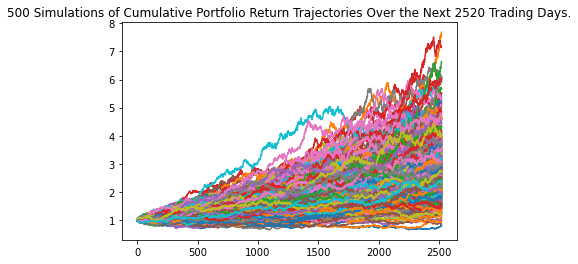

In [47]:
# Plot simulation outcomes
line_plot_10yr=MC_ten_years.plot_simulation()

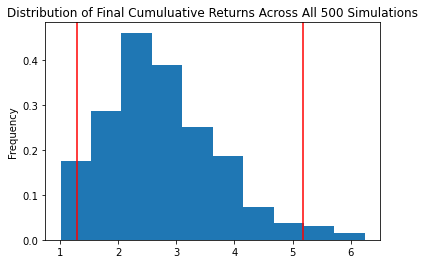

In [65]:
# Plot probability distribution and confidence intervals
dist_plot_10yr=MC_ten_years.plot_distribution()

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten=MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.747228
std               0.983060
min               1.005676
25%               2.070063
50%               2.604759
75%               3.307295
max               6.245103
95% CI Lower      1.295623
95% CI Upper      5.178833
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(tbl_ten[8]*initial_investment,2)
ci_upper_ten=round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77571.25 and $411197.99


**For a 10 year Retirement options, there is 95% chance the ending value of portfolio is higher than initial investment. Compared to 5 years option, 10 year time horizon portfolio can take higher risk.**